NAME: MULI LILIAN MWIKALI

##### Problem Statement:
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer's segments, those are eligible for loan amount so that they can specifically target these customers.

#### 1. Data Understanding:
Features: Analyze the features like Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, etc.
Target Variable: The target variable is likely the loan eligibility status (e.g., eligible or not eligible).

#### 2. Data Preprocessing:
1. Handle Missing Values: Check for any missing values and decide how to handle them (e.g., filling in, discarding).
2. Encoding Categorical Variables: Convert categorical variables (e.g., Gender, Marital Status) into numerical formats using techniques like one-hot encoding or label encoding.
3. Feature Scaling: Scale features like Income, Loan Amount to ensure they're on the same scale.

####  3. Exploratory Data Analysis (EDA):
1. Correlation Analysis: Check correlations between features and the target variable to identify key predictors.
2. Visualizations: Use visualizations (e.g., histograms, box plots) to understand the distribution of features and their relationship with the target variable.

#### 4. Model Selection:
Choose appropriate classification models, such as:
Logistic Regression: Simple and interpretable.
 1. Train the model(fit the training datasets)
 2. Predict the model
 3. Deploy the model


In [141]:
# import necessary libraries
import numpy as np
import pandas as pd

In [142]:
#load data sets
loan_train = pd.read_csv('loan-train.csv')
loan_test = pd.read_csv('loan-test.csv')

In [143]:
#read loan_train dataset
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [144]:
#read loan_test dataset
loan_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


#### Understanding the train data

In [145]:
#statistical summary of our train dataset
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [146]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


From the code above,,train dataset should have a maximum of 614 entries,,can tell there're some columns with missing values,,in the section of exploratory data analysis below, we'll tackle the missing values.

#### Understanding the test train data

In [147]:
#statistical summary of the test train data
loan_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [148]:
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


#### Data processing
Handling Missing Values

In [149]:
#get the percentage of missing values in the training data
#calculate the total number of missing values in each column
missing_values = loan_train.isna().sum()
#calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(loan_train) * 100)
missing_percentage

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [150]:
#get the percentage of missing data in our test data
#get missing values of each column in the test data
missing_values = loan_test.isna().sum()
#calculate the percentage of missing values in each column\
missing_percentage = (missing_values / len(loan_test) * 100)
missing_percentage

Loan_ID              0.000000
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

Most of the columns above have a small percentage of missing values,,we'll use mean,mode to fill in the rows for our most relevant columns to use.

#### Filling in missing values in our columns

In [151]:
#fill in the missing values in gender,dependents,married,credit history,self employed,loan amount term with mode
loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)
loan_test['Gender'].fillna(loan_test['Gender'].mode()[0],inplace=True)

loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0],inplace=True)
loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0],inplace=True)

loan_train['Married'].fillna(loan_train['Married'].mode()[0],inplace=True)
loan_test['Married'].fillna(loan_test['Married'].mode()[0],inplace=True)

loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0],inplace=True)
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mode()[0],inplace=True)

loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0],inplace=True)
loan_test['Self_Employed'].fillna(loan_test['Self_Employed'].mode()[0],inplace=True)

loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mode()[0],inplace=True)
loan_test['Loan_Amount_Term'].fillna(loan_test['Loan_Amount_Term'].mode()[0],inplace=True)

#### Fill in the missing values in the loan amount column with mean

In [152]:
loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].mean(),inplace=True)
loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].mean(),inplace=True)

In [153]:
loan_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [154]:
loan_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

#### Both datasets(loan_train and loan_test) are clean,,no more missing values

#### Convert categorical variables to numerical values

In [155]:
#The columns with categorical variables are loan status,gender,married and selfemployed
loan_train['Loan_Status'] = loan_train['Loan_Status'].replace({"Y": 1, "N" : 0})
 
loan_train['Gender'] = loan_train['Gender'].replace({"Male": 1, "Female" : 0})
loan_test['Gender'] = loan_test['Gender'].replace({"Male": 1, "Female" : 0})

loan_train['Married'] = loan_train['Married'].replace({"Yes": 1, "No" : 0})
loan_test['Married'] = loan_test['Married'].replace({"Yes": 1, "No" : 0})

loan_train['Self_Employed'] = loan_train['Self_Employed'].replace({"Yes": 1, "No" : 0})
loan_test['Self_Employed'] = loan_test['Self_Employed'].replace({"Yes": 1, "No" : 0})


In [156]:
#read the first columns of loan_train
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,Graduate,0,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,1,1,1,Graduate,0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,1,1,0,Graduate,1,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,1,1,0,Not Graduate,0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,1,0,0,Graduate,0,6000,0.0,141.000000,360.0,1.0,Urban,1


In [157]:
#first five columns of loan_test
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,Graduate,0,5720,0,110.0,360.0,1.0,Urban
1,LP001022,1,1,1,Graduate,0,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,1,1,2,Graduate,0,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,1,1,2,Graduate,0,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,1,0,0,Not Graduate,0,3276,0,78.0,360.0,1.0,Urban


In [158]:
#print the first 15 rows of 'Dependents' from loan_train and loan_test as arrays to check whether the column has multiple values
dependents_loan_array = np.array(loan_train['Dependents'][:15])
print("Dependents in loan_array as an array:",dependents_loan_array)

dependents_test_array = np.array(loan_test['Dependents'][:15])
print("Dependents in loan_test as an array:",dependents_test_array)

Dependents in loan_array as an array: ['0' '1' '0' '0' '0' '2' '0' '3+' '2' '1' '2' '2' '2' '0' '2']
Dependents in loan_test as an array: ['0' '1' '2' '2' '0' '0' '1' '2' '2' '0' '0' '1' '3+' '2' '0']


#### From our output above 0,1,2 are numeric values but it also has 3+ which is not a straightforward number it might be meaning 3 or more dependents.We'll have to convert the 3+ to a numeric value  by using the replace method and convert the column to an integer type.

In [159]:
#Convert the column to integer type
loan_train['Dependents'] = loan_train['Dependents'].replace('3+',3)
loan_test['Dependents'] = loan_test['Dependents'].replace('3+',3)

In [160]:
#convert the column to an integer type
loan_train['Dependents'] = loan_train['Dependents'].astype(int)
loan_test['Dependents'] = loan_test['Dependents'].astype(int)

In [161]:
#display type of values in our column'Dependents' in both datasets
print(loan_train['Dependents'].dtype)
print()
print(loan_test['Dependents'].dtype)

int32

int32


### The column 'Dependents' is ready for machine learning since values are (integers) meaning the machine can understand the data

In [162]:
#display the first 10 rows of education in both datasets as arrays
print(np.array(loan_train['Education'][:10]))
print()
print(np.array(loan_test['Education'][:10]))

['Graduate' 'Graduate' 'Graduate' 'Not Graduate' 'Graduate' 'Graduate'
 'Not Graduate' 'Graduate' 'Graduate' 'Graduate']

['Graduate' 'Graduate' 'Graduate' 'Graduate' 'Not Graduate' 'Not Graduate'
 'Not Graduate' 'Not Graduate' 'Graduate' 'Not Graduate']


In [163]:
#display the first 10 rows of Property_area in both datasets
print(np.array(loan_train['Property_Area'][:10]))
print()
print(np.array(loan_test['Property_Area'][:10]))

['Urban' 'Rural' 'Urban' 'Urban' 'Urban' 'Urban' 'Urban' 'Semiurban'
 'Urban' 'Semiurban']

['Urban' 'Urban' 'Urban' 'Urban' 'Urban' 'Urban' 'Semiurban' 'Rural'
 'Urban' 'Semiurban']


#### Here,property_area and education have multiple values.We can use LabelEncoder from sklearn package first to convert the categorical values into numbers so as to help the machine understand our data for machine learning.

In [164]:
#Convert the categorical columns into numeric values
#import necessary library
from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education']
#instanciate the labelencoder
encoder = LabelEncoder()
for col in feature_col:
    loan_train[col] = encoder.fit_transform(loan_train[col])
    loan_test[col] = encoder.fit_transform(loan_test[col])


In [165]:
#display the first ten rows of the above columns as arrays
print(np.array(loan_train['Property_Area'][:10]))
print()
print(np.array(loan_test['Property_Area'][:10]))
print()
print(np.array(loan_train['Education'][:10]))
print()
print(np.array(loan_test['Education'][:10]))

[2 0 2 2 2 2 2 1 2 1]

[2 2 2 2 2 2 1 0 2 1]

[0 0 0 1 0 0 1 0 0 0]

[0 0 0 0 1 1 1 1 0 1]


##### Finally we have all the features with numerical values
      1. Property_area 0 is for rural, 1 for semi_urban and 2 for urban
      2. Education 0 is for graduate and 1 for not graduate

In [166]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [167]:
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


### Data Visualizations

In [168]:
#import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Scatter plot to show relationship between Applicant Income vs Loan Amount

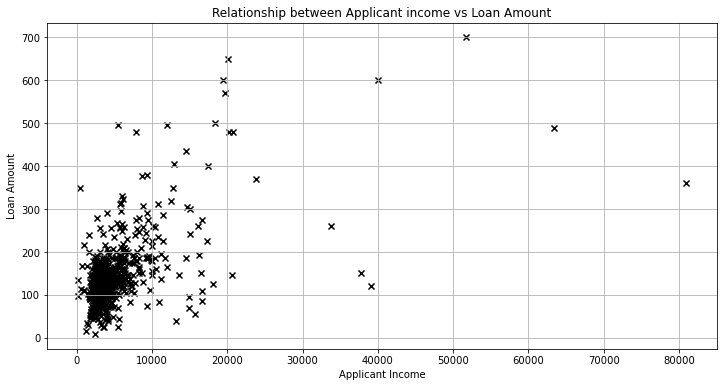

In [169]:
plt.figure (figsize = (12,6))
plt.scatter(loan_train['ApplicantIncome'] ,loan_train['LoanAmount'], c ='k',marker='x')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title ('Relationship between Applicant income vs Loan Amount')
plt.grid()
plt.show()

##### From our graph above:
1. Concentration of points.
There is a high concentration of points in the lower left corner of the graph indicating that most applicants have relatively lower income and are applying for smaller loan amounts respectively.
2. Outliers.
A few points are scattered from the main concentration of data where these outliers represent the applicants with high income who are requesting for large loan amounts.
3. Non-linear relationship.
The relationship between applicant income and loan amount doesnt appear to be strictly linear.
4. Interpretation.
The graph suggests that while income is a factor in determination of loan amount,,other factors like credit history from our data are most likely to influence as well.

#### 2. Relationship between credit history and loan amount

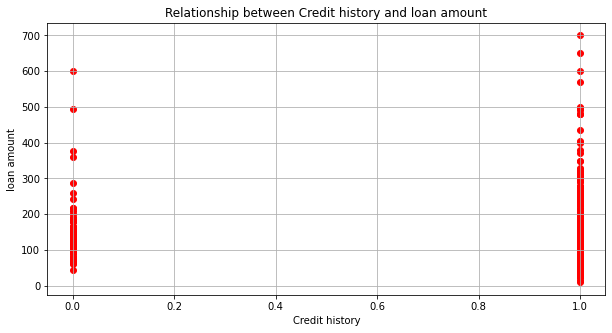

In [170]:
plt.figure(figsize= (10,5))
plt.scatter(loan_train['Credit_History'],loan_train['LoanAmount'],c='r',marker='o')
plt.xlabel('Credit history')
plt.ylabel('loan amount')
plt.title('Relationship between Credit history and loan amount')
plt.grid()
plt.show()

##### From our graph above
0 represents poor or no credit history and 1 indicates a good credit history
1. Distribution of loan amounts.
Most loans are around applicants with a credit history.This indicates that applicants with credit history tend to apply for loans of varrying amounts.
There are fewer applicants with a credit history of 0 though they still apply for loans but the amounts vary widely.


#### 3. Loan amount versus property area based by loan status

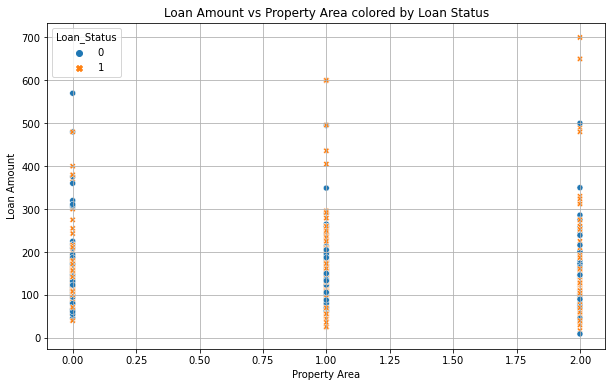

In [171]:
plt.figure(figsize=(10, 6))
# Use hue to color the points by Loan_Status
sns.scatterplot(data=loan_train, x='Property_Area', y='LoanAmount', hue='Loan_Status', style='Loan_Status')
plt.xlabel('Property Area')
plt.ylabel('Loan Amount')
plt.title('Loan Amount vs Property Area colored by Loan Status')
plt.grid(True)
plt.show()


#### From our graph above:
In some property areas, 1 which indicates semi urban and 2 for urban areas,loans seem to be approved more often which indicates a positive trend in loan eligibility for applicants requesting for loans in these property areas.
in each property category ,one can observe how the loan status (eligible or not eligible) is distributed.

#### 4. Credit history versus Loan status

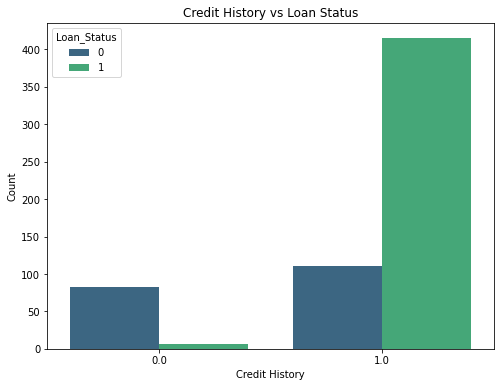

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a count plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.countplot(x='Credit_History', hue='Loan_Status', data=loan_train, palette='viridis')

# Add labels and title
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.title('Credit History vs Loan Status')

# Display the plot
plt.show()


From our graph above:

1. **Credit History 0.0:**

.This represents customers with a credit history of 0, meaning they likely have a poor or no credit history.

.The blue bar shows that among these customers, a larger number had their loans rejected (Loan Status = 0).

.The green bar for Loan Status = 1 (loans approved) is very small, indicating very few loans were approved for customers with a credit history of 0.

2. **Credit History 1.0:**

.This represents customers with a credit history of 1, indicating they have a good credit history.

.The blue bar here is relatively small, showing that fewer customers with a good credit history had their loans rejected.

.The green bar is significantly larger, showing that a majority of customers with a good credit history had their loans approved.

 **Conclusion:**

.Customers with a good credit history (1.0) are much more likely to have their loans approved than those with a poor or no credit history (0.0).

.This graph clearly shows that credit history is a strong factor influencing loan approval.

#### 5. Credit history versus Gender coloured by Loan status

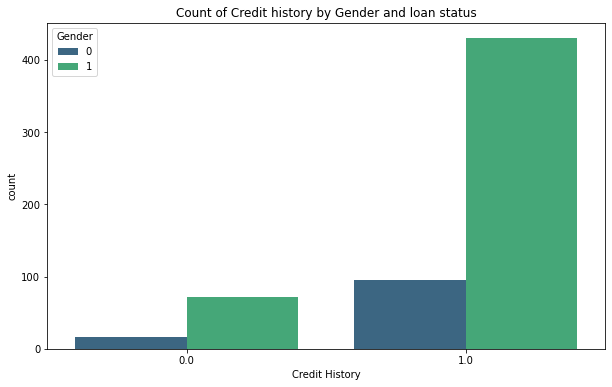

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Scatter plot
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_train, x='Credit_History', hue='Gender', palette='viridis')
plt.title('Count of Credit history by Gender and loan status')
plt.xlabel('Credit History')
plt.ylabel('count')
plt.legend(title='Gender')
plt.show()


From the graph above:

Credit history.

              .1 is for a good credit history

              .0 is for poor or no credit history

Gender.

       .0 is for female

      .1 is for male

**Interpretation**

ladies have a poor credit history compared to men and though the count of eligibility of the loan is a bit significant.

Male have both a high credit history and still the count of eligibility of the loan is high.

#### Visualizing the correlation matrix

In [172]:
correlation_matrix = loan_train.corr()
correlation_matrix 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.001963,0.540556


#### Display the correlation matrix as a heatmap

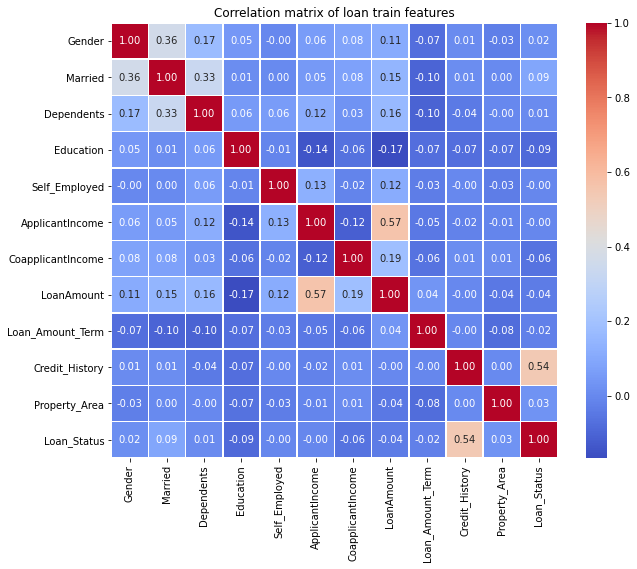

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.022549
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64


In [173]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.5)
plt.title('Correlation matrix of loan train features')
plt.show()
# To see the correlation of all columns with 'Loan_Status' specifically
correlation_with_loan_status = correlation_matrix['Loan_Status'].sort_values(ascending=False)
print(correlation_with_loan_status)


#### Machine Learning Model

In [174]:
#import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [175]:
#instanciate the model
logistic_model = LogisticRegression()

##### Before fitting the model,let's settle on the features that can be used (from the features available) for training and testing,then fit the model using the training data

In [176]:
train_features = ['ApplicantIncome','Credit_History','Education','Gender','Property_Area','LoanAmount']
X_train = loan_train[train_features].values #independent variables
y_train = loan_train['Loan_Status'].values #dependent variable

X_test = loan_test[train_features].values

In [177]:
print(np.array(X_train)[:5])
print()
print(np.array(y_train)[:5])
print()
print(np.array(X_test)[:5])

[[5.84900000e+03 1.00000000e+00 0.00000000e+00 1.00000000e+00
  2.00000000e+00 1.46412162e+02]
 [4.58300000e+03 1.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 1.28000000e+02]
 [3.00000000e+03 1.00000000e+00 0.00000000e+00 1.00000000e+00
  2.00000000e+00 6.60000000e+01]
 [2.58300000e+03 1.00000000e+00 1.00000000e+00 1.00000000e+00
  2.00000000e+00 1.20000000e+02]
 [6.00000000e+03 1.00000000e+00 0.00000000e+00 1.00000000e+00
  2.00000000e+00 1.41000000e+02]]

[1 0 1 1 1]

[[5.720e+03 1.000e+00 0.000e+00 1.000e+00 2.000e+00 1.100e+02]
 [3.076e+03 1.000e+00 0.000e+00 1.000e+00 2.000e+00 1.260e+02]
 [5.000e+03 1.000e+00 0.000e+00 1.000e+00 2.000e+00 2.080e+02]
 [2.340e+03 1.000e+00 0.000e+00 1.000e+00 2.000e+00 1.000e+02]
 [3.276e+03 1.000e+00 1.000e+00 1.000e+00 2.000e+00 7.800e+01]]


In [178]:
#fit the model using training data
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [190]:
#predict the model for testing data
y_pred_test = logistic_model.predict(X_test)
y_pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [196]:
from sklearn.metrics import classification_report
#classification report for training test
y_pred_train = logistic_model.predict(X_train)
report = classification_report(y_train,y_pred_train)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.43      0.58       192
           1       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.85      0.70      0.73       614
weighted avg       0.83      0.81      0.78       614



0 is for Not eligible

1 is for eligible

Metrics summary for each class:
1. **Precision**

.For class 0(not eligible) precision 0.91 means that 91% of the instances predicted as class zero were correctly classified.

.For class 1 (eligible) precision 0.79 meaning that 79% of the instances predicted as class 1 were correctly classified.

2. **Recall**

Recall is the ratio of correctly predicted positive observations to all observations in the actual class.

.For class 0 recall is 0.43 meaning the model correctly identified 43% of the actual class 0 instances.

.For class 1 recall is 0.98 meaning that the model correctly identified 98% of the actual class 1 instances.

3. **F1-score**

The F1 score is harmonic mean of precision and recall.It is a balance between the two metrics and is particularly useful when you have an uneven class distribution.

.For class 0 the F1 score is 0.58 indicating a moderate balance between precision and recall.

.For class 1 the F1 score is 0.88 indicating a good balance between precision and recall.

4. **Support**

.For class 0 there are 192 instances.

.For class 1 there are 422 instances.

**Interpretation**
Class 0: The model has a low recall of 0.43, this could be because the model is biased towards predicting class 1.
Class 1: The model performs well with class 1,achieving a high recall of 0.98 and an F1 score of 0.88

The model has a descent accuracy of 81%, but the imbalance in performance between the two classes is evident,particularly in the lower recall for class 0.


In [180]:
# check the coefficients of the trained model
print(logistic_model.coef_)

[[ 1.49716739e-05  2.81734234e+00 -7.69844482e-01 -3.99994313e-01
  -1.60288751e-02 -3.32921595e-03]]


In [182]:
#intercept of the model
print(logistic_model.intercept_)

[-0.57855006]


In [184]:
#Accuracy score on training set
#Accuracy_train = accuracy_score(X_train,y_train)
score = logistic_model.score(X_train,y_train)
print('accuracy_score overall:',score)
print('accuracy_score percent:',round(score*100,2))

accuracy_score overall: 0.8078175895765473
accuracy_score percent: 80.78


In [185]:
#predict the target on the test dataset
predicted_test = logistic_model.predict(X_test)
print('Target on test data',predicted_test)

Target on test data [1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


#### Train a Random Forest Model

In [222]:
#instanciate the random forest model
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
Rdm_forest_model = RandomForestClassifier(n_estimators=100,class_weight='balanced',max_depth=10,random_state = 42)

In [223]:
#Train the model using the training data
Rdm_forest_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [224]:
#predict on the training set
y_pred_trainRf = Rdm_forest_model.predict(X_train)

In [234]:
#Evaluating the model
print("Random Forest Accuracy:",accuracy_score(y_train,y_pred_trainRf))
print()
print("Classification report:\n" ,classification_report(y_train,y_pred_trainRf))

Random Forest Accuracy: 0.9560260586319218

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92       192
           1       0.94      1.00      0.97       422

    accuracy                           0.96       614
   macro avg       0.97      0.93      0.95       614
weighted avg       0.96      0.96      0.96       614



0 for Not eligible

1 for eligible

**Metrics for each class**

1. **Precision**

.Class 0, 0.99 means that 99% of the instances predicted as class 0 were actually class 0.

.Class 1, 0.94 means that 94% of the instances predicted as class 1 were actually class 1.

2. **Recall**

.Class 0, 0.86 means 86% of the actual class 0 instances were correctly identified by the model.

.Class 1, 1.00 means that 100% of the actual class 1 instances were correctly identified by the model.

3. **F1-Score**

.Class 0, 0.92 the F1 score balances precision and recall indicating a strong perfomance in predicting class 0.

.Class 1, 0.97 the F1 score is high,indicating that the model is excellent at predicting class 1.

4. **Support**

.Class 0 has 192 instances in the training set

.Class 1 has 422 instances in the training set

**Interpretation**

Class 0: The model performs very well in predicting class 0, with high precision (0.99) and good recall (0.86). The F1-score of 0.92 shows a strong balance between precision and recall.

Class 1: The model performs exceptionally well in predicting class 1, with perfect recall (1.00) and high precision (0.94). The F1-score of 0.97 reflects excellent performance.

**Overall** 

The model has a high accuracy of 96%, indicating it is doing a good job of classifying the training data. The balanced precision, recall, and F1-scores across both classes suggest that the model is not heavily biased toward one class over the other.




In [226]:
#predict the target on the test dataset
predicted_test = Rdm_forest_model.predict(X_test)
print('Target on test data',predicted_test)

Target on test data [1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1]


### Recommendations
1. **Targeted Outreach:**

Based on the identified segments, develop targeted marketing strategies. For example, if high-income individuals with good credit history are more likely to be approved, tailor marketing efforts towards this segment.

2. **Real-Time Automation:**

Implement real-time scoring algorithms that consider Gender, Applicant Income, and Credit History to evaluate loan eligibility. Ensure that the scoring model is updated regularly with new data to maintain accuracy.

3. **Bias and Fairness Review:**

Regularly review and audit the automated system to ensure it is fair and unbiased. Ensure compliance with legal and ethical standards, particularly regarding gender and other sensitive attributes.

4. **Segment Identification:**

Gender: Identify if certain genders are more likely to be approved for loans. Ensure to consider this in a fair and unbiased manner, ensuring compliance with regulations.

Applicant Income: Segment applicants based on their income levels to determine which income brackets are more likely to receive loans. Higher income has indicated higher loan eligibility.

Credit History: Focus on applicants with good credit history as they are more likely to be eligible for loans. Create segments based on credit scores or history.


### Conclusion

By focusing on Gender, Applicant Income, and Credit History, Dream Housing Finance can effectively streamline their loan eligibility process. The recommendation is to use machine learning models to identify and validate these factors' impact on loan approvals. Implementing a targeted approach based on these insights will enhance efficiency and accuracy in loan processing while ensuring fair and unbiased decision-making. Regularly updating the system and reviewing for biases will ensure long-term effectiveness and compliance.
